# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [17]:
# Import essential libraries

# Import essential libraries
import zipfile
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from PIL import Image
from pathlib import Path
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T



Load the dataset.

In [18]:
import zipfile
import os

ip_file_path = r"C:\Users\Asus\Downloads\data.zip"  # Path to your zip file
extract_path = "Downloads/data"  # Directory to extract to
# Extract the zip file
with zipfile.ZipFile(ip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")



Extraction complete!


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [19]:
def load_images_and_labels(path):
    images = []
    labels = []

    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            if file.endswith(('.jpg', '.png', '.jpeg')):
                img = Image.open(os.path.join(folder_path, file)).convert('RGB')
                images.append(img)
                labels.append(folder)

    return images, labels


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [31]:
# Get the images and their labels
dataset_path = "Downloads/data/data"
images, labels = load_images_and_labels(dataset_path)


Looking in: Downloads/data/data
Checking folder: Downloads/data/data\Cardboard
Loading image: Downloads/data/data\Cardboard\file_1.png
Loading image: Downloads/data/data\Cardboard\file_10.png
Loading image: Downloads/data/data\Cardboard\file_100.png
Loading image: Downloads/data/data\Cardboard\file_101.png
Loading image: Downloads/data/data\Cardboard\file_102.png
Loading image: Downloads/data/data\Cardboard\file_103.png
Loading image: Downloads/data/data\Cardboard\file_104.png
Loading image: Downloads/data/data\Cardboard\file_105.png
Loading image: Downloads/data/data\Cardboard\file_106.png
Loading image: Downloads/data/data\Cardboard\file_107.png
Loading image: Downloads/data/data\Cardboard\file_108.png
Loading image: Downloads/data/data\Cardboard\file_109.png
Loading image: Downloads/data/data\Cardboard\file_11.png
Loading image: Downloads/data/data\Cardboard\file_110.png
Loading image: Downloads/data/data\Cardboard\file_111.png
Loading image: Downloads/data/data\Cardboard\file_112.p

In [33]:
from collections import Counter

# Count the number of images per label
label_counts = Counter(labels)

print(f"Image count per label:")
for label, count in label_counts.items():
    print(f"{label}: {count} images")


Image count per label:
Cardboard: 540 images
Food_Waste: 1000 images
Glass: 750 images
Metal: 1000 images
Other: 1010 images
Paper: 1030 images
Plastic: 2295 images


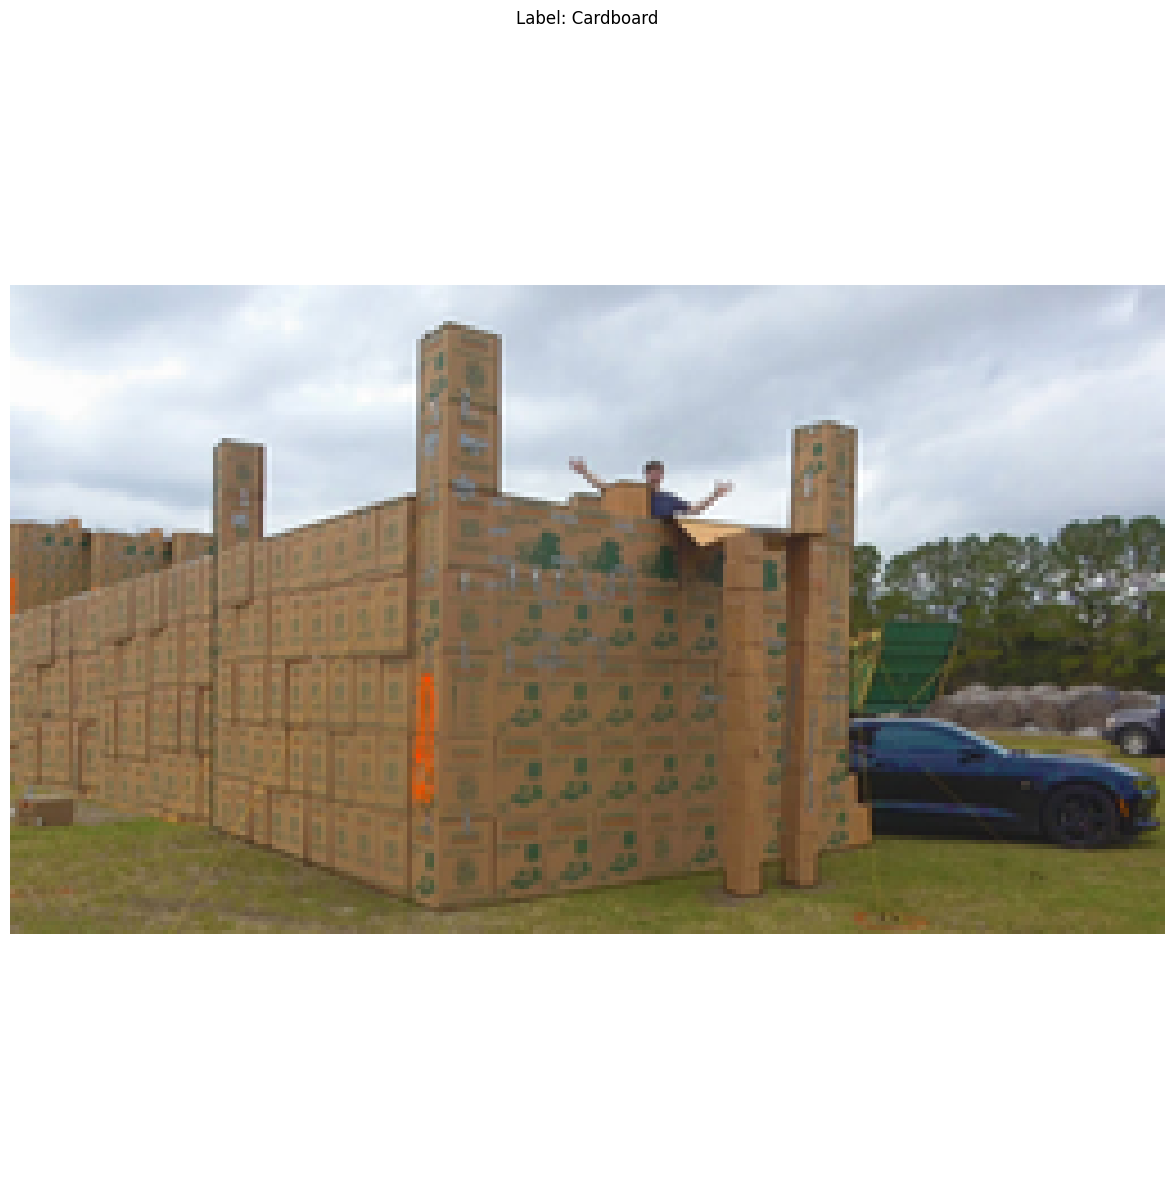

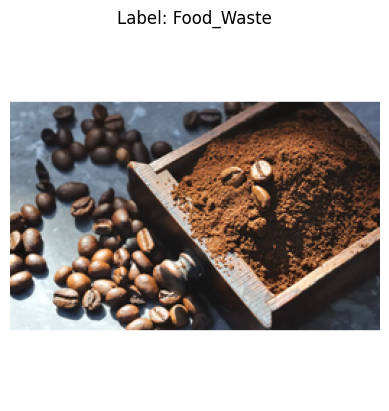

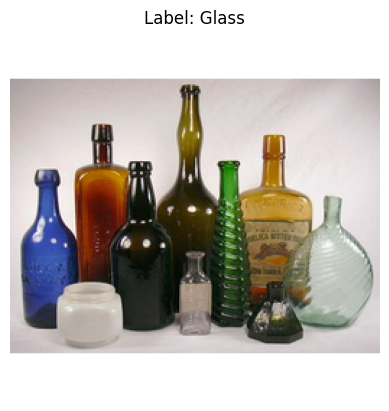

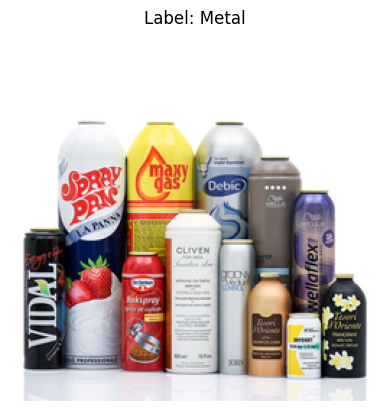

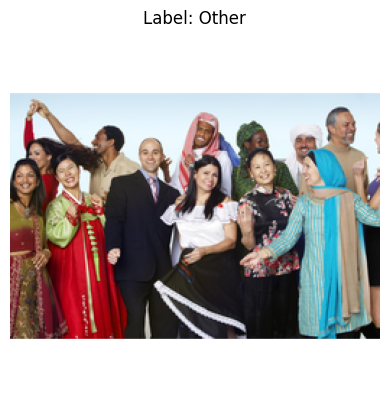

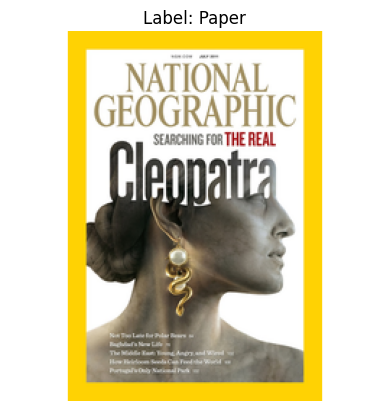

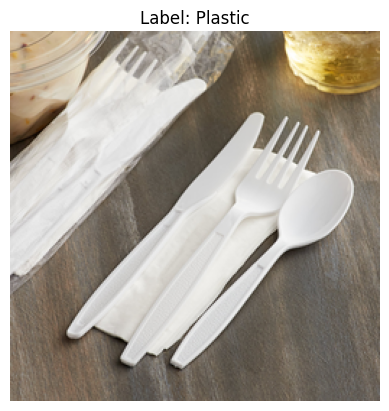

In [52]:
def display_sample_images(images, labels):
    # Create a set to keep track of displayed labels
    displayed_labels = set()
    plt.figure(figsize=(15, 15))
    
    for img, label in zip(images, labels):
        if label not in displayed_labels:
            displayed_labels.add(label)
            plt.imshow(img)
            plt.title(f"Label: {label}")
            plt.axis('off')
            plt.show()

# Display images from different folders
display_sample_images(images, labels)


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

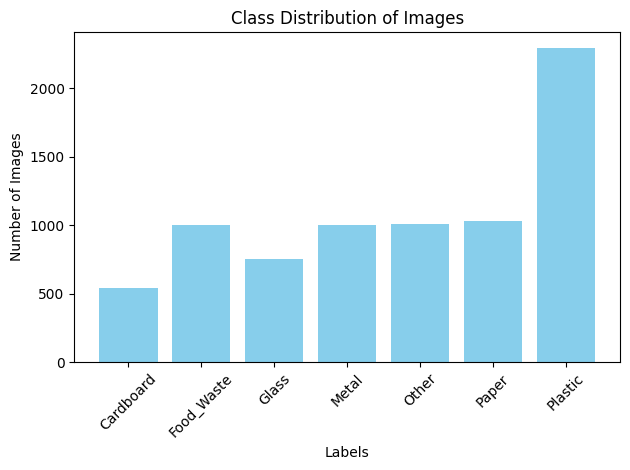

In [53]:
# Visualise Data Distribution
# Count images per label
label_counts = Counter(labels)

# Create a bar plot
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Images')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [55]:
# Set up the figure
plt.figure(figsize=(15, 10))

# Initialize index for subplot
idx = 1
for label in set(labels):
    # Get all indices for this label
    indices = [i for i, lbl in enumerate(labels) if lbl == label]
    
    # Display the first 5 images for this label
    for i in range(min(5, len(indices))):
        plt.subplot(len(set(labels)), 5, idx)
        plt.imshow(images[indices[i]])
        plt.title(f"Label: {label}")
        plt.axis('off')
        idx += 1

# Adjust layout and show
plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [56]:
# Find the smallest and largest image dimensions from the data set
# Initialize min and max dimensions
min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0

# Find the smallest and largest dimensions
for img in images:
    width, height = img.size
    min_width, min_height = min(min_width, width), min(min_height, height)
    max_width, max_height = max(max_width, width), max(max_height, height)

# Print the results
print(f"Smallest image dimensions: {min_width}x{min_height}")
print(f"Largest image dimensions: {max_width}x{max_height}")


Smallest image dimensions: 256x256
Largest image dimensions: 256x256


In [60]:
# Resize images to a smaller size (e.g., 128x128)
resized_images = [img.resize((128, 128)) for img in images]
for i in range(5):  # Print dimensions of the first 5 images
    print(f"Image {i+1} size: {resized_images[i].size}")
    

Image 1 size: (128, 128)
Image 2 size: (128, 128)
Image 3 size: (128, 128)
Image 4 size: (128, 128)
Image 5 size: (128, 128)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [62]:
unique_labels = set(labels)
print(f"Unique labels: {unique_labels}")


Unique labels: {'Other', 'Metal', 'Food_Waste', 'Paper', 'Glass', 'Plastic', 'Cardboard'}


In [70]:
from sklearn.preprocessing import LabelEncoder

# Convert all labels to regular Python strings
labels = [str(label) for label in labels]

# Correct label order
label_names = ['Cardboard', 'Food_Waste', 'Plastic', 'Metal', 'Glass', 'Paper', 'Other']

# Encode labels
le = LabelEncoder()
le.fit(label_names)
encoded_labels = le.transform(labels)

# Print results
print("Encoded Labels (first 5):", encoded_labels[:5])
print("Label Mapping:", {str(label): int(le.transform([label])[0]) for label in le.classes_})


Encoded Labels (first 5): [0 0 0 0 0]
Label Mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


In [72]:
for i in range(800):
    print(f"Original: {labels[i]} -> Encoded: {encoded_labels[i]}")


Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Cardboard -> Encoded: 0
Original: Card

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
dataset_path = "Downloads/data/data"

# Create a data generator with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),     # Resize all images
    batch_size=32,
    class_mode='categorical',   # For one-hot encoded labels
    subset='training',
    shuffle=True
)

# Validation generator
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 6101 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Function to create a simple CNN model
def create_simple_model(dropout_rate=0.5):
    model = Sequential([
        # First Convolutional Layer
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        # Second Convolutional Layer
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        # Flatten the output for fully connected layers
        Flatten(),

        # Fully connected layer
        Dense(128, activation='relu'),
        Dropout(dropout_rate),

        # Output layer for 7 classes (Softmax for multi-class classification)
        Dense(7, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = create_simple_model()

# Print model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,607 (28.20 MB)

 Trainable params: 7,393,415 (28.20 MB)

 Non-trainable params: 192 (768.00 B)

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Function to create a more advanced CNN model
def create_advanced_model(dropout_rate=0.5):
    model = Sequential([
        # First Convolutional Layer
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        # Second Convolutional Layer
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        # Third Convolutional Layer
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        # Flatten the output for fully connected layers
        Flatten(),

        # Fully connected layer
        Dense(512, activation='relu'),
        Dropout(dropout_rate),

        # Output layer for 7 classes (Softmax for multi-class classification)
        Dense(7, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = create_advanced_model()

# Print model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,943,303 (49.37 MB)

 Trainable params: 12,942,855 (49.37 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [82]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set up early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Assuming you have your data generators (train_generator and val_generator)
# Replace these with actual generators (e.g., ImageDataGenerator for loading images in batches)

# Train the model
history = model.fit(
    train_generator,  # Your training data generator
    epochs=10,  # Number of epochs (can be adjusted)
    validation_data=val_generator,  # Your validation data generator
    callbacks=[early_stopping, checkpoint],  # Use callbacks for early stopping and saving the best model
    batch_size=16  # Smaller batch size to reduce system load
)

# Optionally, evaluate the model
# model.evaluate(val_generator)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.2369 - loss: 9.2453
Epoch 1: val_accuracy improved from -inf to 0.30361, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 50s 251ms/step - accuracy: 0.2370 - loss: 9.2286 - val_accuracy: 0.3036 - val_loss: 1.9292
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.3311 - loss: 2.2236
Epoch 2: val_accuracy did not improve from 0.30361
191/191 ━━━━━━━━━━━━━━━━━━━━ 48s 252ms/step - accuracy: 0.3311 - loss: 2.2231 - val_accuracy: 0.2577 - val_loss: 1.9799
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.3453 - loss: 1.9071
Epoch 3: val_accuracy improved from 0.30361 to 0.31869, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - accuracy: 0.3453 - loss: 1.9068 - val_accuracy: 0.3187 - val_loss: 1.8154
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.3367 - loss: 1.7891
Epoch 4: val_accuracy improved from 0.31869 to 0.33770, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 49s 258ms/step - accuracy: 0.3367 - loss: 1.7890 - val_accuracy: 0.3377 - val_loss: 2.5426
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.3578 - loss: 1.6882
Epoch 5: val_accuracy improved from 0.33770 to 0.35016, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 248ms/step - accuracy: 0.3578 - loss: 1.6883 - val_accuracy: 0.3502 - val_loss: 2.4575
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.3661 - loss: 1.6482
Epoch 6: val_accuracy did not improve from 0.35016
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - accuracy: 0.3661 - loss: 1.6481 - val_accuracy: 0.3456 - val_loss: 2.3439


In [84]:
history = model.fit(
    train_generator,
    steps_per_epoch=191,  # Set the number of steps per epoch based on your dataset
    epochs=10,
    validation_data=val_generator,
    validation_steps=50  # Set the number of validation steps
)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 70s 353ms/step - accuracy: 0.2890 - loss: 6.9706 - val_accuracy: 0.2839 - val_loss: 2.7029
Epoch 2/10


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 355ms/step - accuracy: 0.3928 - loss: 2.0641 - val_accuracy: 0.1954 - val_loss: 3.5586
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 350ms/step - accuracy: 0.4476 - loss: 1.6157 - val_accuracy: 0.3731 - val_loss: 1.7341
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 347ms/step - accuracy: 0.5266 - loss: 1.3048 - val_accuracy: 0.3403 - val_loss: 3.2374
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 350ms/step - accuracy: 0.5634 - loss: 1.1936 - val_accuracy: 0.4708 - val_loss: 1.5706
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 355ms/step - accuracy: 0.6293 - loss: 1.0043 - val_accuracy: 0.4944 - val_loss: 1.6852
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 70s 366ms/step - accuracy: 0.6573 - loss: 0.9313 - val_accuracy: 0.4341 - val_loss: 2.5085
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 70s 367ms/step - accuracy: 0.7104 - loss: 0.7982 - val_accuracy: 0.5154 - val_loss: 1.8426
Epoch 9/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 347ms/step - accuracy: 0.7272 - loss: 0.7745 - val

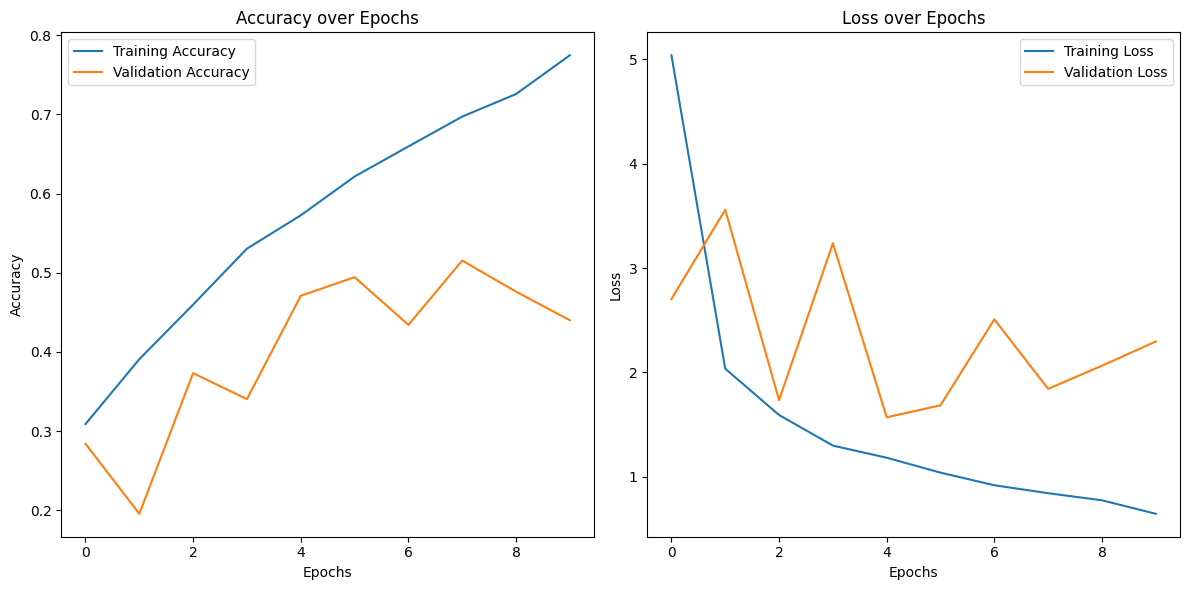

In [85]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [88]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.3339 - loss: 3.1684
Validation Loss: 2.296117067337036
Validation Accuracy: 0.4399999976158142


In [89]:
from sklearn.metrics import precision_score, f1_score
import numpy as np

# Get predictions for the validation set
val_predictions = model.predict(val_generator)

# Convert the predictions to class labels (by taking the index of the highest probability)
predicted_classes = np.argmax(val_predictions, axis=1)

# Get the true labels (true class labels)
true_labels = val_generator.classes

# Compute precision and F1 score
precision = precision_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step
Precision: 0.5296559369775553
F1 Score: 0.42123715359784464


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

**Findings About the Data:**

* The dataset comprises 7625 images categorized into seven classes: 'Other', 'Metal', 'Food_Waste', 'Paper', 'Glass', 'Plastic', and 'Cardboard'.
* The class distribution is imbalanced. The 'Plastic' class has significantly more images (2295) than other classes, notably 'Cardboard' (540) and 'Glass' (750). This imbalance likely contributed to the model's challenges.
* The image data itself was not described, so assumptions are that the images had varied qualities.




The Convolutional Neural Network (CNN) model exhibits signs of overfitting and suboptimal performance on the validation dataset.

* **Training Performance:**
    * The training accuracy increases significantly over the 10 epochs, reaching 77.54%.
    * The training loss decreases steadily, indicating effective learning on the training data.
* **Validation Performance:**
    * The validation accuracy fluctuates, peaking around 51% and ending at approximately 44%.
    * The validation loss generally increases after a few epochs, suggesting poor generalization.
    * The validation loss of 2.29 is quite high.
* **Evaluation Metrics:**
    * Precision: 0.529, indicating roughly 53% of predicted positives are accurate.
    * F1-score: 0.421, indicating a poor balance between precision and recall.
    * The test accuracy is 0.33, which is very low.

**Key Observations and Potential Issues:**

* **Overfitting:** A clear gap between training and validation performance.
* **Data Issues:** "Your input ran out of data" warning suggests dataset or generator problems.
* **Model Complexity:** Over 12 million parameters may contribute to overfitting.
* **Poor Generalization:** Low validation accuracy and F1-score.
* **Low test accuracy:** The model is not performing well on data it has not seen before.

